Chapter 08

# 相关性距离矩阵
Book_7《机器学习》 | 鸢尾花书：从加减乘除到机器学习

In [1]:
# ! pip install yfinance

In [2]:
# initializations
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [3]:
# load historical price levels for 12 stocks
list_tickers = ['TSLA','WMT','MCD','USB',
                'YUM','NFLX','JPM','PFE',
                'F','GM','COST','JNJ']

stock_levels_df = yf.download(list_tickers, start='2020-01-01', end='2020-5-31')
stock_levels_df.to_pickle('stock_levels_df.pkl')
stock_levels_df.to_csv("stock_levels_df.csv")

[*********************100%%**********************]  12 of 12 completed


In [4]:
stock_levels_df.round(2).head()

Adj Close                                                      \
                COST     F     GM     JNJ     JPM     MCD    NFLX    PFE   
Date                                                                       
2020-01-02    275.58  8.08  36.48  131.09  125.02  184.27  329.81  31.81   
2020-01-03    275.81  7.90  35.44  129.57  123.37  183.62  325.90  31.64   
2020-01-06    275.88  7.85  34.97  129.41  123.27  185.69  335.83  31.60   
2020-01-07    275.45  7.93  34.30  130.20  121.18  185.96  330.75  31.49   
2020-01-08    278.61  7.93  33.81  130.18  122.12  188.97  339.26  31.75   

                          ...    Volume                                       \
             TSLA    USB  ...        GM      JNJ       JPM      MCD     NFLX   
Date                      ...                                                  
2020-01-02  28.68  50.50  ...   7454400  5777000  10803700  3554200  4485800   
2020-01-03  29.53  49.91  ...   9173000  5752400  10386800  2767600  3806900   
2020-01-06  30.10  49.22  ...   8408200  7731300  10259000  4660400  5663100   
2020-01-07  31.27  48.76  ...  17556800  7382900  10531300  4047400  4703200   
2020-01-08  32.81  48.65  ...  13229400  6605800   9695300  5284200  7104500   

                                                            
                 PFE       TSLA      USB      WMT      YUM  
Date                                                        
2020-01-02  16514072  142981500  5002100  6764900  1369900  
2020-01-03  14922848  266677500  5161800  5399200  1145500  
2020-01-06  15771951  151995000  6869200  6445500  1454100  
2020-01-07  20108107  268231500  4006800  6846900  1388600  
2020-01-08  16403507  467164500  5627500  5875800  1521500  

[5 rows x 72 columns]

In [5]:
# calculate daily returns
daily_returns_df = stock_levels_df['Adj Close'].pct_change()

In [6]:
#%% Lineplot of stock prices


sns.set_style("whitegrid") 
sns.set_theme(font = 'Times New Roman')

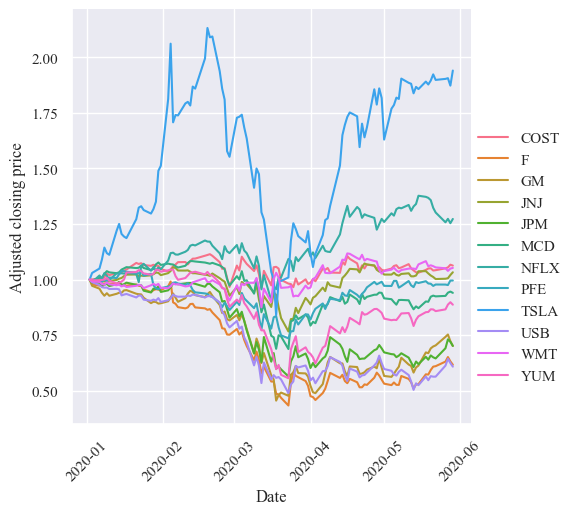

In [7]:
# normalize the initial stock price levels to 1
normalized_stock_levels = stock_levels_df['Adj Close']/stock_levels_df['Adj Close'].iloc[0]

g = sns.relplot(data=normalized_stock_levels,dashes = False,
                kind="line") # , palette="coolwarm"
g.set_xlabels('Date')
g.set_ylabels('Adjusted closing price')
g.set_xticklabels(rotation=45)

<AxesSubplot:>

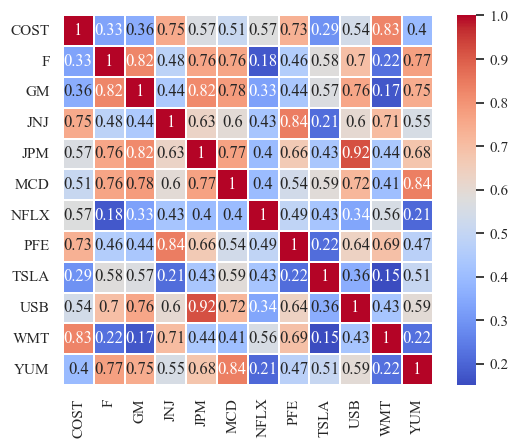

In [8]:
#%% Heatmap of correlation matrix

fig, ax = plt.subplots()
# Compute the correlation matrix
corr_P = daily_returns_df.corr()

sns.heatmap(corr_P, cmap="coolwarm",
            square=True, linewidths=.05, 
            annot=True)

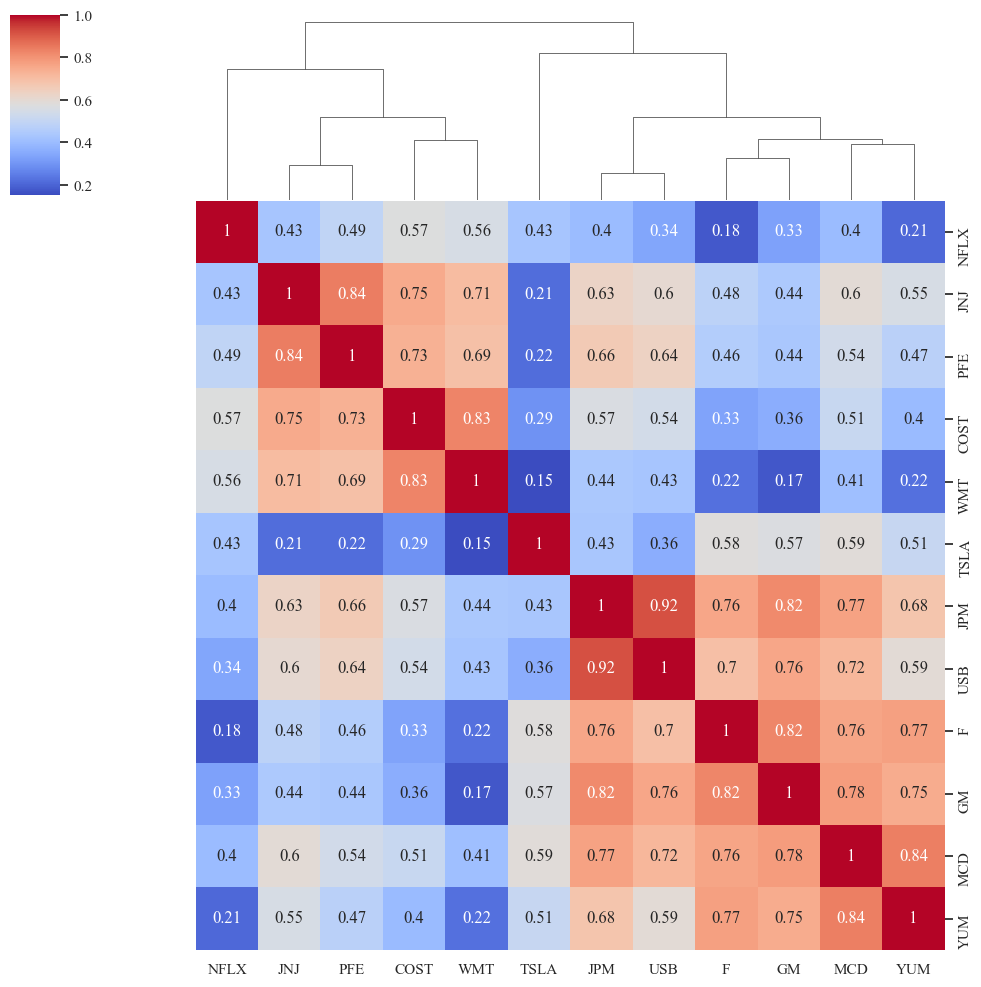

In [9]:
#%% Cluster map based on correlation

g = sns.clustermap(corr_P, cmap="coolwarm", 
                   annot=True)
g.ax_row_dendrogram.remove()